### This is a regression problem which predicts the price of a car using features of car as provided in the dataset. This dataset is downloaded from kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


**observation:** the column 'enginelocation' is not so useful as almost all of its values are type 'front'

## Data preprocessing

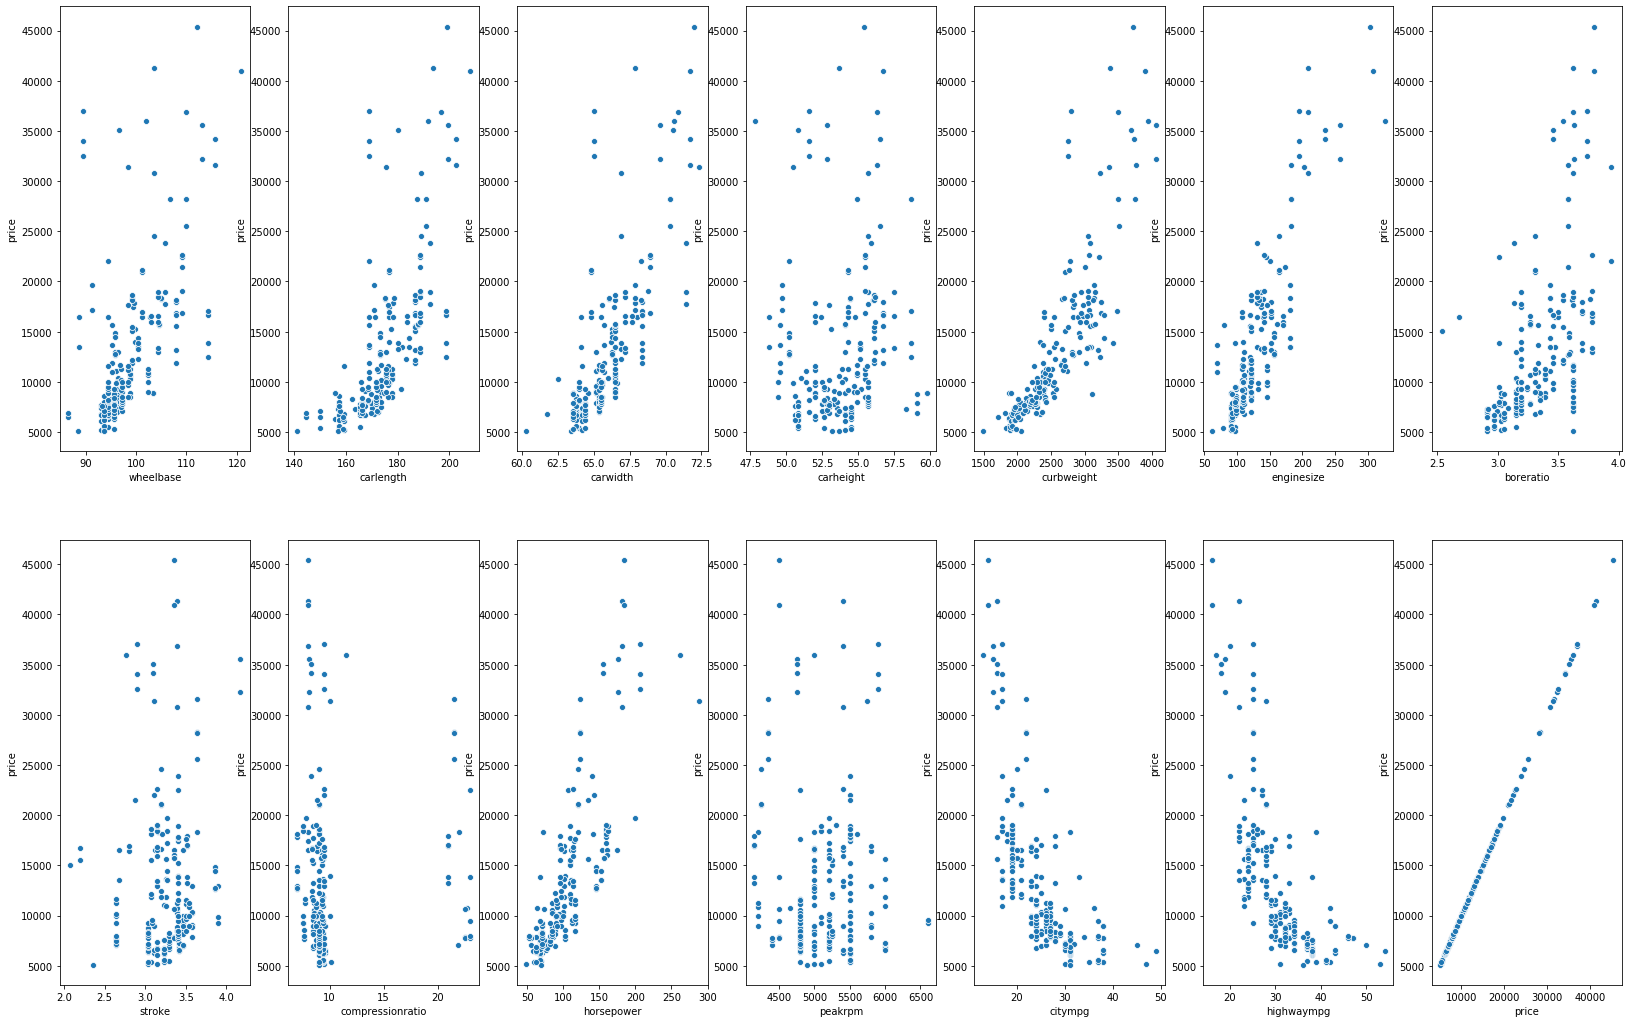

In [7]:
plt.subplots(2,7,figsize=(28,18))
cols=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
      'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
for i,col in enumerate(cols):
    plt.subplot(2,7,i+1)
    sns.scatterplot(x=col,y='price',data=data)

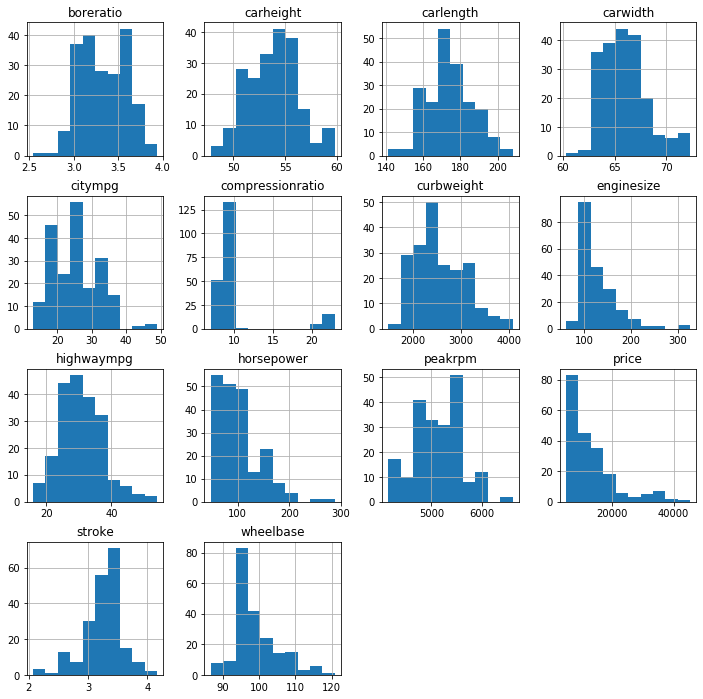

In [8]:
df=data[cols]
df.hist(figsize=(12,12));

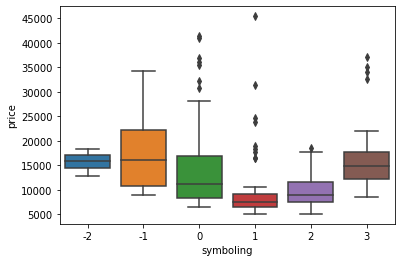

In [9]:
sns.boxplot(x='symboling',y='price',data=data);

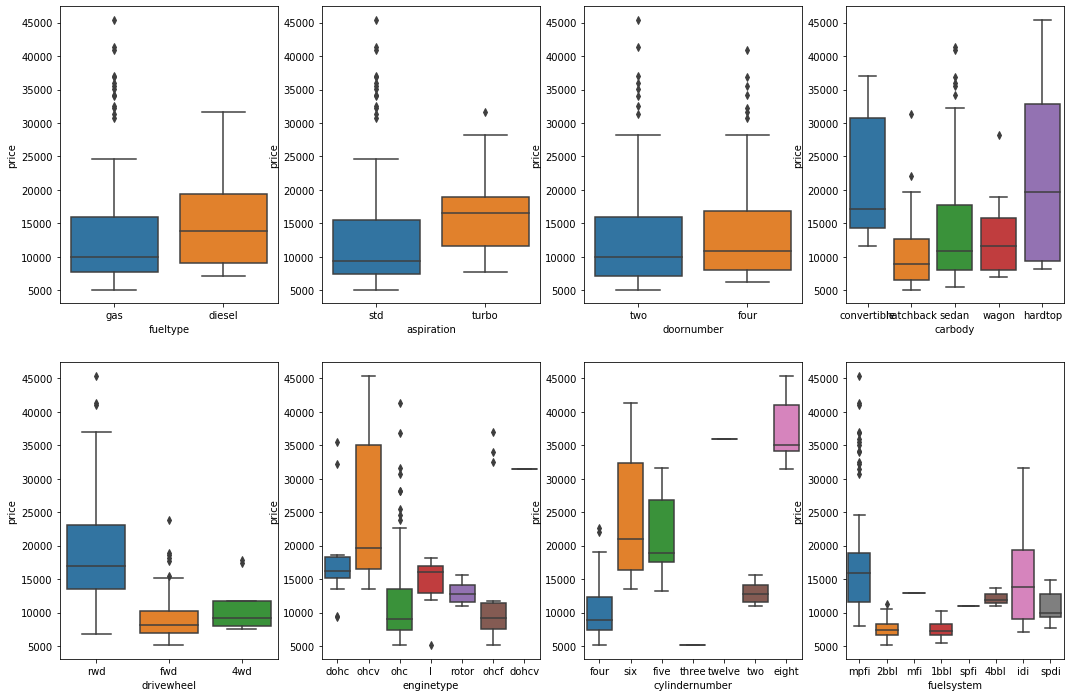

In [10]:
cat_cols=['fueltype','aspiration','doornumber','carbody','drivewheel',
          'enginetype','cylindernumber','fuelsystem']

plt.subplots(2,4,figsize=(18,12))
for i,col in enumerate(cat_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=col,y='price',data=data)

All the categorical columns seem to affect the price of the car in the dataset.

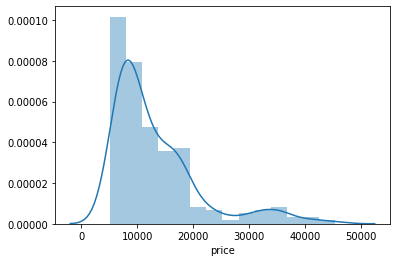

In [11]:
sns.distplot(data['price']);

Observation:The price contain outliers as the distribution plot is largely right skewed.We need to apply Interquantile range to remove outliers.

## Feature engineering

In [12]:
#removing outliers in price column
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

-5284.5
29575.5


In [13]:
data=data[(data['price']>lower) & (data['price']<upper)]
len(data)

190

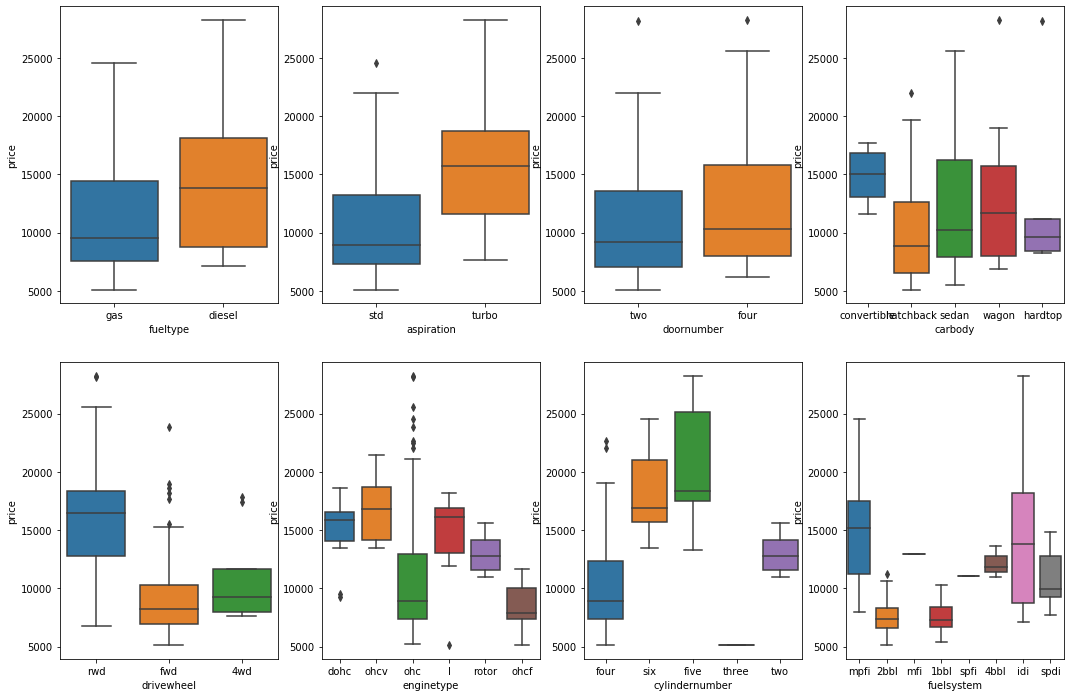

In [14]:
cat_cols=['fueltype','aspiration','doornumber','carbody','drivewheel',
          'enginetype','cylindernumber','fuelsystem']

plt.subplots(2,4,figsize=(18,12))
for i,col in enumerate(cat_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=col,y='price',data=data)

In [15]:
#creating dummy varibles for all categorical columns
dummies=pd.get_dummies(data[cat_cols])

#removing the categorical columns
data=pd.concat([data,dummies],axis=1)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#removing the categorical columns present in the data
data=data.drop(cat_cols,axis=1)

In [17]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

## Feature selection

We will select all the columns except 'car_ID','CarName','enginelocation' as they are not useful in the prediction of the model

In [18]:
X=data.drop(['car_ID','CarName','enginelocation','price'],axis=1)
y=data['price']

In [19]:
X.shape,y.shape

((190, 47), (190,))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=134)

In [22]:
X_train.shape,X_test.shape

((152, 47), (38, 47))

In [23]:
models=[LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        SVR()]

In [24]:
for model in models:
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model)
    print('Training score ',model.score(X_train,y_train))
    print('RMSE: ',np.sqrt(mean_squared_error(preds,y_test)))
    print('mean absolute error: ',mean_absolute_error(preds,y_test))
    print('---------------------------------------------------------\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training score  0.8984567674648176
RMSE:  2195.770456995359
mean absolute error:  1673.3350936675683
---------------------------------------------------------

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Training score  0.9975269389730467
RMSE:  2718.2884801687496
mean absolute error:  1834.7456052631578
---------------------------------------------------------

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples